**Prática 07 – Agrupamento dos Dados de Teste do Trabalho Prático com K-Means**

**Alunos:

GIOVANNI SURIANI FERREIRA

JORGE ALIOMAR TROCOLI ABDON DANTAS**

Objetivo:<br>
- Aplicar técnicas de Aprendizado Não Supervisionado, utilizando o algoritmo K-Means, para identificar agrupamentos nos dados de teste utilizados no trabalho prático.

Tarefa: <br>
- Carregue o conjunto de dados de teste utilizado no seu trabalho prático. 
    - Verifique se há necessidade de tratamento de valores ausentes ou normalização dos atributos numéricos.
- Selecione os atributos relevantes para a formação dos grupos.
    - Explique sua escolha dos atributos com base na intuição ou conhecimento do domínio.
    - Evite atributos altamente correlacionados ou identificadores.
- Normalize os dados utilizando StandardScaler ou método equivalente.
- Aplique o algoritmo K-Means, iniciando com .
    - Visualize os agrupamentos usando um gráfico de dispersão (scatter plot), se possível.
    - Obtenha os centróides dos grupos e crie um gráfico de barras agrupadas comparando os valores médios por atributo.
- Repita o experimento com k=2 e k=4.
    - Compare os agrupamentos obtidos com os de k=3.
    - Escolha o valor de k que, na sua avaliação, gera o agrupamento mais coerente.
- Analise os grupos formados:
    - Quais características são comuns entre os elementos de cada grupo?
    - Houve separação clara?
    - Algum grupo parece conter outliers, ou seja, isntancias que se desviam significativamente do padrão
geral dos outros dados?

Analise:<br>
- Como a escolha do valor de k afetou os resultados?
- Os agrupamentos fazem sentido em termos práticos ou de negócio?
- Como o K-Means lidou com os dados do seu trabalho prático?
- Os agrupamentos poderiam ser utilizados para melhorar de alguma forma o resultado da classificação?

Entrega: A dupla deverá entregar e apresentar:<br>
- Um notebook Jupyter (.ipynb) contendo:
O código-fonte do agrupamento.
    - As visualizações dos grupos.
    - O gráfico de barras dos centróides.
    - Uma caixa de texto breve com análise solicitada acima.

# PREPARAÇÃO DA BASE DE DADOS - Todos os dados

In [1]:
#Importando Bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Otimizador Giovanni
#from sklearnex import patch_sklearn
#patch_sklearn()

#CSV_PATH = "/home/gi/Desktop/Semestre8/Inteligencia_Computacional/TP1_csvs" # Path Giovanni
#validacao_cruzada_num_folds = 10 # Para Giovanni
CSV_PATH = "E:/Documentos/CEFET/OneDrive/Documentos/2ECOM067_INTELIGENCIA-COMPUTACIONAL-I_T01/TP1/bases/" # Path Jorge
validacao_cruzada_num_folds = 2 # Para Jorge

In [2]:
#Carregando Base de dados principal - Treino
df_train = pd.read_csv(f"{CSV_PATH}/df_train_full.csv")
df_test  = pd.read_csv(f"{CSV_PATH}/df_test_full.csv")

# PREPARAÇÃO DA BASE DE DADOS - Amostra

## Verificação com colunas com muitos nulos (mais que 25%)

In [3]:
#Calcular o % de nulos por coluna
percentual_nulos = round(df_train.isnull().mean(),2)

# Verificar quais colunas têm mais de 25% de valores nulos
colunas_com_muitos_nulos = percentual_nulos[percentual_nulos > 0.25].index.tolist()

## Exclusão das coluna com muitos nulos

In [4]:
df_train_tratado = df_train.copy()
df_test_tratado  = df_test.copy()

# Excluir colunas do treino
df_train_tratado = df_train_tratado.drop(columns=colunas_com_muitos_nulos)

# Excluir colunas do teste
df_test_tratado = df_test_tratado.drop(columns=colunas_com_muitos_nulos)

## Substitutição dos nulos

In [5]:
#Tratar colunas numéricas - Treino
for coluna in df_train_tratado.select_dtypes(include=['number']).columns:
    if df_train_tratado[coluna].isnull().any():
        if pd.api.types.is_float_dtype(df_train_tratado[coluna]): # Se tipo de dado for float, realizará a média
            media = df_train_tratado[coluna].mean()
            df_train_tratado[coluna] = df_train_tratado[coluna].fillna(media)
        elif pd.api.types.is_integer_dtype(df_train_tratado[coluna]): # Se tipo de dado for int, realizará a moda
            moda = df_train_tratado[coluna].mode(dropna=True)
            if not moda.empty:
                df_train_tratado[coluna] = df_train_tratado[coluna].fillna(moda[0])

#Tratar colunas categóricas com a moda  - Treino
colunas_categoricas = df_train_tratado.select_dtypes(include=['object', 'category']).columns

for coluna in colunas_categoricas:
    if df_train_tratado[coluna].isnull().any():
        moda = df_train_tratado[coluna].mode(dropna=True)
        if not moda.empty:
            df_train_tratado[coluna] = df_train_tratado[coluna].fillna(moda[0])

#Validação - Treino
print("Total de valores nulos restantes nos dados de treino:", df_train_tratado.isnull().sum().sum())

Total de valores nulos restantes nos dados de treino: 0


In [6]:
#Tratar colunas numéricas - Teste
for coluna in df_test_tratado.select_dtypes(include=['number']).columns:
    if df_test_tratado[coluna].isnull().any():
        if pd.api.types.is_float_dtype(df_test_tratado[coluna]): # Se tipo de dado for float, realizará a média
            media = df_test_tratado[coluna].mean()
            df_test_tratado[coluna] = df_test_tratado[coluna].fillna(media)
        elif pd.api.types.is_integer_dtype(df_test_tratado[coluna]): # Se tipo de dado for int, realizará a moda
            moda = df_test_tratado[coluna].mode(dropna=True)
            if not moda.empty:
                df_test_tratado[coluna] = df_test_tratado[coluna].fillna(moda[0])

#Tratar colunas categóricas com a moda  - Teste
colunas_categoricas = df_test_tratado.select_dtypes(include=['object', 'category']).columns

for coluna in colunas_categoricas:
    if df_test_tratado[coluna].isnull().any():
        moda = df_test_tratado[coluna].mode(dropna=True)
        if not moda.empty:
            df_test_tratado[coluna] = df_test_tratado[coluna].fillna(moda[0])

#Validação - Treino
print("Total de valores nulos restantes nos dados de teste:", df_test_tratado.isnull().sum().sum())

Total de valores nulos restantes nos dados de teste: 0


## Realizar transformação das variáveis categóricas em variáveis númericas (Label Enconder)

In [7]:
#Importação da biblioteca
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Busca dos atributos do tipo object e category - TREINO
colunas_categoricas_train = df_train_tratado.select_dtypes(include=['object', 'category']).columns.tolist()

#Concatenação dos dataframes treino e teste com o objetivo de realizar um label enconder com códigos únicos
df_all = pd.concat([df_train_tratado, df_test_tratado], axis=0)

for coluna in colunas_categoricas_train:
    le.fit(df_all[coluna])
    df_train_tratado[coluna] = le.transform(df_train_tratado[coluna].astype(str))
    df_test_tratado[coluna] = le.transform(df_test_tratado[coluna].astype(str))


## Fazer amostragem

In [8]:
#Amostra df_train
df_train_tratado_amostrado = df_train_tratado.sample(frac=0.001, random_state=42)  # Para Jorge
#df_train_tratado_amostrado = df_train.sample(frac=1, random_state=42)  # Para Giovanni

# Divisão de Treino/Teste

In [9]:
#Divisão treino / teste
X_train = df_train_tratado_amostrado.drop(columns={"TARGET"})
y_train = df_train_tratado_amostrado.TARGET
X_test  = df_test_tratado.copy()

In [10]:
#Verificar se y_train tem 0 e 1. Se true, OK dá para continuar a modelagem
#                                Se false, ajustar para que tenha 0 e 1
set(y_train) == {0, 1}

True

# Normalização Padrão

In [11]:
# importando a biblioteca
from sklearn.preprocessing import  StandardScaler

# instancioando o escalador
scaler = StandardScaler()
X_train_normalizado = scaler.fit_transform(X_train)
X_train_normalizado = pd.DataFrame(X_train_normalizado, columns = X_train.columns)

y_train_normalizado = y_train.copy()

X_test_normalizado  = scaler.fit_transform(X_test)
X_test_normalizado  = pd.DataFrame(X_test_normalizado, columns =X_test.columns)

# Seleção de Parãmetros

In [12]:
#Importação biblioteca
from sklearn.feature_selection import RFE, RFECV

from sklearn.model_selection import StratifiedKFold

from xgboost                import XGBClassifier            # XGBClassifier           


#Atribuição do melhor modelo selecionado
modelo_base = XGBClassifier(random_state=42)

#RFE com validação cruzada
cv = StratifiedKFold(n_splits = validacao_cruzada_num_folds)
rfecv = RFECV(estimator = modelo_base, step=1, cv = cv, min_features_to_select = 20, n_jobs=-1)

#Treino
rfecv.fit(X_train_normalizado, y_train_normalizado)

# Resultados
print("Número ótimo de features:", rfecv.n_features_)
colunas_selecionadas = X_train_normalizado.columns[rfecv.support_]
print("Colunas selecionadas:", colunas_selecionadas.tolist())


Número ótimo de features: 24
Colunas selecionadas: ['SK_ID_CURR', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE', 'SK_ID_PREV', 'DAYS_DECISION', 'CNT_INSTALMENT_FUTURE', 'DAYS_INSTALMENT', 'AMT_PAYMENT']


In [13]:
X_train_normalizado_colunasSelecionadas = X_train_normalizado[colunas_selecionadas]

In [14]:
X_train_normalizado_colunasSelecionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  308 non-null    float64
 1   CODE_GENDER                 308 non-null    float64
 2   AMT_INCOME_TOTAL            308 non-null    float64
 3   AMT_CREDIT                  308 non-null    float64
 4   AMT_ANNUITY                 308 non-null    float64
 5   NAME_INCOME_TYPE            308 non-null    float64
 6   REGION_POPULATION_RELATIVE  308 non-null    float64
 7   DAYS_BIRTH                  308 non-null    float64
 8   DAYS_EMPLOYED               308 non-null    float64
 9   DAYS_REGISTRATION           308 non-null    float64
 10  WEEKDAY_APPR_PROCESS_START  308 non-null    float64
 11  HOUR_APPR_PROCESS_START     308 non-null    float64
 12  ORGANIZATION_TYPE           308 non-null    float64
 13  EXT_SOURCE_2                308 non

# Aplicação do K-Means (k =3)

## Executamos o K-Means com `k=3` para descobrir 3 grupos nos dados.

In [15]:
# impotando a biblioteca
from sklearn.cluster import KMeans

#Copia do DataFrame
dados = X_train_normalizado_colunasSelecionadas.copy()

#Instanciando o KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

#Predição dos grupos
dados['grupo'] = kmeans.fit_predict(X_train_normalizado_colunasSelecionadas)
dados

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,1.091813,1.341641,0.276835,-0.295210,2.037863,-1.546720,-0.828173,0.628193,-0.485764,1.157712,...,-0.102473,0.099456,-0.088475,-0.028006,0.034514,0.715238,-0.603598,0.788847,0.005362,0
1,-0.569843,-0.745356,0.578679,1.794981,1.754623,-1.546720,-1.032836,0.295414,-0.488350,0.885275,...,-0.206904,-0.410991,0.028259,0.877718,-0.060754,1.063805,-0.685931,-0.338002,-0.028707,0
2,-1.269109,-0.745356,0.243297,-0.219560,1.000464,0.867417,1.099257,-0.407669,-0.484924,0.634118,...,-0.250369,-0.317236,0.825164,0.834588,0.191781,-2.491058,-0.850597,-0.326398,-0.004470,0
3,1.136587,-0.745356,0.578679,-0.834898,-0.085925,-0.339651,1.867518,-0.793926,-0.528212,-1.790653,...,0.777404,1.825749,0.171453,0.963977,-0.014863,-2.132047,-0.521265,-1.226331,0.123407,0
4,0.108273,1.341641,-0.427467,-0.698072,-0.781780,0.867417,-0.148909,-0.951440,-0.488105,-0.707626,...,-0.079010,-0.421891,0.832946,-2.658918,0.817251,-2.180351,0.302066,-0.706742,-0.183218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1.576276,-0.745356,-0.645466,-0.899428,-0.185284,-0.742008,0.574043,-1.583967,2.012039,0.091484,...,-0.308451,0.004212,-0.908728,-0.329914,0.382287,-0.256051,0.960731,0.481994,0.017669,2
304,1.774595,-0.745356,-0.259776,-0.323268,-0.707951,0.867417,0.574043,-0.534399,-0.489742,-1.054822,...,-0.263832,-0.257708,-0.578759,1.265885,0.999536,-0.408794,-0.438931,1.267178,-0.299920,1
305,-1.189146,-0.745356,0.746370,1.825171,0.738958,-0.742008,-0.790084,-0.967618,2.012039,-1.100741,...,-0.324029,-0.399389,-1.117293,0.920847,1.714981,0.610798,-0.027266,0.873941,-0.204742,2
306,-0.771280,1.341641,1.081753,1.365108,2.372163,-0.339651,0.142099,-0.172634,-0.536756,1.163872,...,-0.133822,-0.329343,0.815825,-0.718082,1.538965,-0.299132,-0.685931,-0.029859,0.302718,0


##  Visualização dos Grupos
Visualizamos os personagens usando os atributos `AMT_INCOME_TOTAL` e `AMT_CREDIT`.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')
    #for i, row in grupo.iterrows():
    #    plt.text(row['AMT_INCOME_TOTAL'], row['AMT_CREDIT'], row['SK_ID_CURR'], fontsize=8)

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Agrupamento dos Clientes')
plt.grid(True)
plt.show()

In [ ]:
kmeans.cluster_centers_

In [17]:
# Obter os centróides no espaço normalizado
centroides_normalizados = kmeans.cluster_centers_

# Desnormalizar os centróides para os valores reais
#centroides = scaler.inverse_transform(centroides_normalizados)

# Criar um DataFrame com os centroides
colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Exibir os centroides desnormalizados
df_centroides

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,0.112503,0.350317,0.596902,1.020332,1.147578,-0.239062,0.304675,0.196878,-0.466188,0.277308,...,-0.019728,-0.092650,0.041722,0.050166,0.142436,-0.564866,-0.109599,-0.186138,-0.075372,0
1,-0.039523,-0.016164,-0.187144,-0.437599,-0.433973,0.402042,-0.157639,0.378159,-0.496398,0.030300,...,0.013157,0.114924,0.108557,0.027335,-0.090236,0.243734,-0.009907,0.056105,0.049004,1
2,-0.039345,-0.408744,-0.269134,-0.144922,-0.318819,-0.767966,0.028938,-1.266526,1.930599,-0.438942,...,-0.009770,-0.188150,-0.344487,-0.137917,0.057810,0.076282,0.167943,0.089963,-0.033951,2


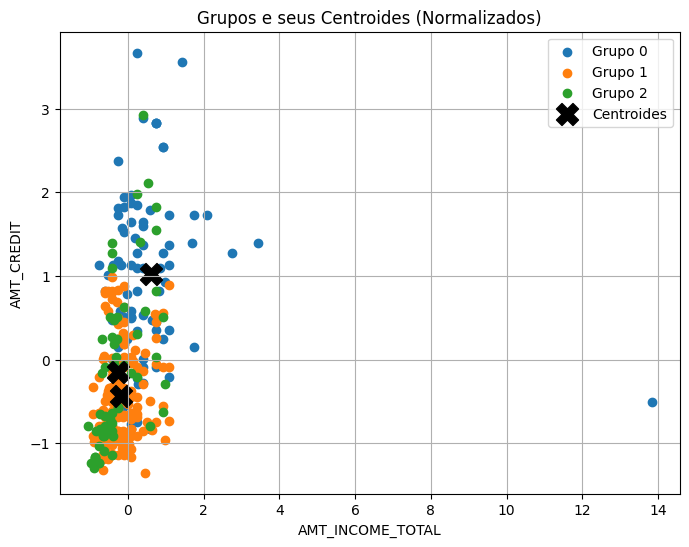

In [18]:
# Visualizar os centroides junto com os dados (ex: AMT_INCOME_TOTAL vs AMT_CRAMT_CREDITEDIT_SUM)
plt.figure(figsize=(8,6))

# Grupos
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')

# Centroides
plt.scatter(df_centroides['AMT_INCOME_TOTAL'], df_centroides['AMT_CREDIT'],
            s=250, c='black', marker='X', label='Centroides')

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Grupos e seus Centroides (Normalizados)')
plt.grid(True)
plt.show()

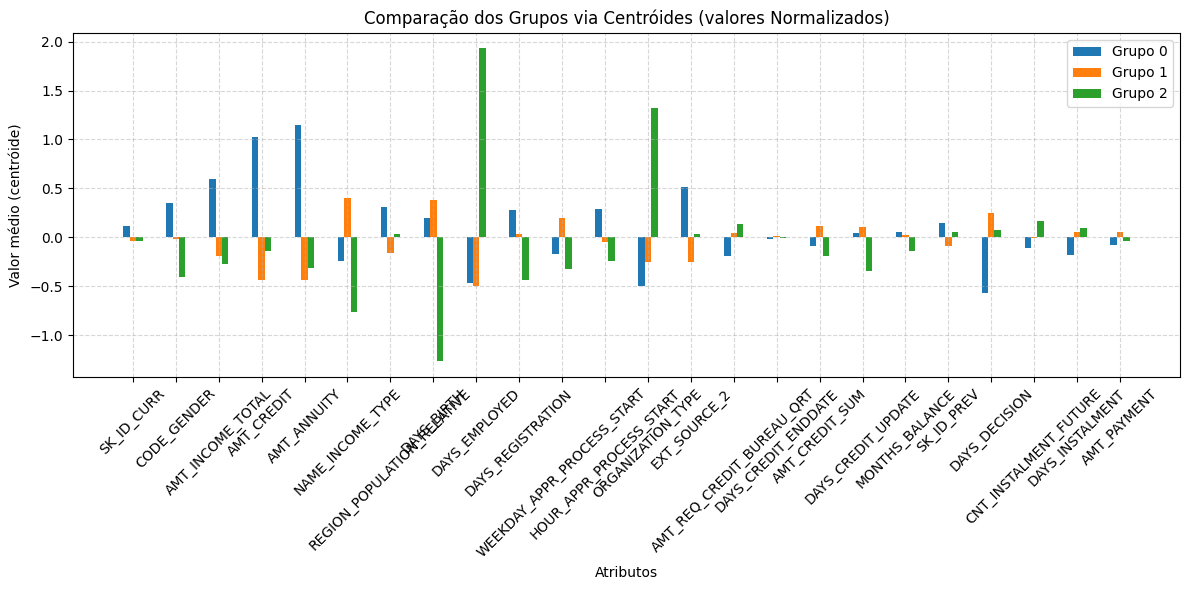

In [19]:
# Recriação dos centroides desnormalizados
centroides_normalizados = kmeans.cluster_centers_

#centroides = scaler.inverse_transform(centroides_normalizados)

colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Gerar gráfico de barras agrupadas
import matplotlib.pyplot as plt
import numpy as np

df_centroides_plot = df_centroides.drop('grupo', axis=1)
atributos = df_centroides_plot.columns
num_grupos = df_centroides.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
largura_barra = 0.15
indices = np.arange(len(atributos))

for i in range(num_grupos):
    valores = df_centroides_plot.iloc[i].values
    ax.bar(indices + i * largura_barra, valores, largura_barra, label=f'Grupo {i}')

ax.set_xlabel('Atributos')
ax.set_ylabel('Valor médio (centróide)')
ax.set_title('Comparação dos Grupos via Centróides (valores Normalizados)')
ax.set_xticks(indices + largura_barra * (num_grupos - 1) / 2)
ax.set_xticklabels(atributos, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Aplicação do K-Means (k =2)

## Executamos o K-Means com `k=2` para descobrir 3 grupos nos dados.

In [20]:
# impotando a biblioteca
from sklearn.cluster import KMeans

#Copia do DataFrame
dados = X_train_normalizado_colunasSelecionadas.copy()

#Instanciando o KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

#Predição dos grupos
dados['grupo'] = kmeans.fit_predict(X_train_normalizado_colunasSelecionadas)
dados

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,1.091813,1.341641,0.276835,-0.295210,2.037863,-1.546720,-0.828173,0.628193,-0.485764,1.157712,...,-0.102473,0.099456,-0.088475,-0.028006,0.034514,0.715238,-0.603598,0.788847,0.005362,1
1,-0.569843,-0.745356,0.578679,1.794981,1.754623,-1.546720,-1.032836,0.295414,-0.488350,0.885275,...,-0.206904,-0.410991,0.028259,0.877718,-0.060754,1.063805,-0.685931,-0.338002,-0.028707,1
2,-1.269109,-0.745356,0.243297,-0.219560,1.000464,0.867417,1.099257,-0.407669,-0.484924,0.634118,...,-0.250369,-0.317236,0.825164,0.834588,0.191781,-2.491058,-0.850597,-0.326398,-0.004470,1
3,1.136587,-0.745356,0.578679,-0.834898,-0.085925,-0.339651,1.867518,-0.793926,-0.528212,-1.790653,...,0.777404,1.825749,0.171453,0.963977,-0.014863,-2.132047,-0.521265,-1.226331,0.123407,1
4,0.108273,1.341641,-0.427467,-0.698072,-0.781780,0.867417,-0.148909,-0.951440,-0.488105,-0.707626,...,-0.079010,-0.421891,0.832946,-2.658918,0.817251,-2.180351,0.302066,-0.706742,-0.183218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1.576276,-0.745356,-0.645466,-0.899428,-0.185284,-0.742008,0.574043,-1.583967,2.012039,0.091484,...,-0.308451,0.004212,-0.908728,-0.329914,0.382287,-0.256051,0.960731,0.481994,0.017669,0
304,1.774595,-0.745356,-0.259776,-0.323268,-0.707951,0.867417,0.574043,-0.534399,-0.489742,-1.054822,...,-0.263832,-0.257708,-0.578759,1.265885,0.999536,-0.408794,-0.438931,1.267178,-0.299920,1
305,-1.189146,-0.745356,0.746370,1.825171,0.738958,-0.742008,-0.790084,-0.967618,2.012039,-1.100741,...,-0.324029,-0.399389,-1.117293,0.920847,1.714981,0.610798,-0.027266,0.873941,-0.204742,0
306,-0.771280,1.341641,1.081753,1.365108,2.372163,-0.339651,0.142099,-0.172634,-0.536756,1.163872,...,-0.133822,-0.329343,0.815825,-0.718082,1.538965,-0.299132,-0.685931,-0.029859,0.302718,1


##  Visualização dos Grupos
Visualizamos os personagens usando os atributos `AMT_INCOME_TOTAL` e `AMT_CREDIT`.

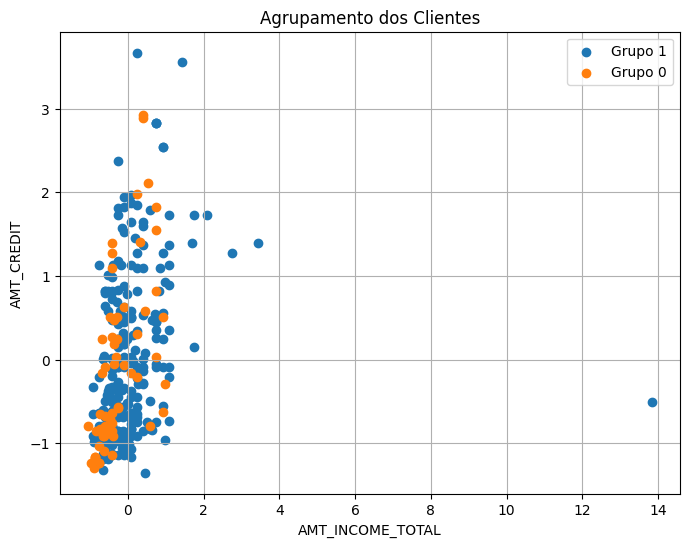

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')
    #for i, row in grupo.iterrows():
    #    plt.text(row['AMT_INCOME_TOTAL'], row['AMT_CREDIT'], row['SK_ID_CURR'], fontsize=8)

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Agrupamento dos Clientes')
plt.grid(True)
plt.show()

In [22]:
kmeans.cluster_centers_

array([[-0.02735765, -0.38095973, -0.25833883, -0.0967214 , -0.2729834 ,
        -0.76755415,  0.03493509, -1.26871135,  1.93189217, -0.43935818,
        -0.33645652, -0.24341746,  1.32620513,  0.02896904,  0.12849526,
        -0.01290852, -0.19072516, -0.3345684 , -0.1224809 ,  0.04637282,
         0.06259359,  0.15961683,  0.09868226, -0.0267706 ],
       [ 0.00703482,  0.09796107,  0.06642999,  0.02487122,  0.07019573,
         0.19737107, -0.00898331,  0.32624006, -0.49677227,  0.11297782,
         0.08651739,  0.06259306, -0.34102418, -0.00744918, -0.03304164,
         0.00331933,  0.04904361,  0.08603187,  0.03149509, -0.01192444,
        -0.01609549, -0.04104433, -0.02537544,  0.00688387]])

In [23]:
# Obter os centróides no espaço normalizado
centroides_normalizados = kmeans.cluster_centers_

# Desnormalizar os centróides para os valores reais
#centroides = scaler.inverse_transform(centroides_normalizados)

# Criar um DataFrame com os centroides
colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Exibir os centroides desnormalizados
df_centroides

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,-0.027358,-0.380960,-0.258339,-0.096721,-0.272983,-0.767554,0.034935,-1.268711,1.931892,-0.439358,...,-0.012909,-0.190725,-0.334568,-0.122481,0.046373,0.062594,0.159617,0.098682,-0.026771,0
1,0.007035,0.097961,0.066430,0.024871,0.070196,0.197371,-0.008983,0.326240,-0.496772,0.112978,...,0.003319,0.049044,0.086032,0.031495,-0.011924,-0.016095,-0.041044,-0.025375,0.006884,1


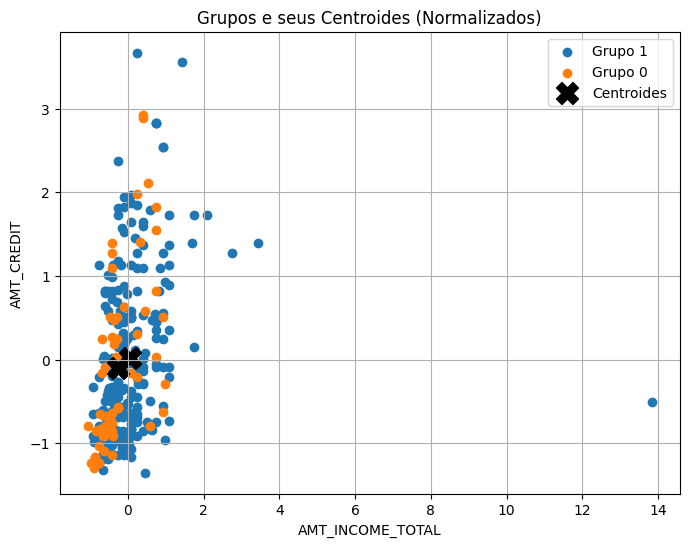

In [24]:
# Visualizar os centroides junto com os dados (ex: AMT_INCOME_TOTAL vs AMT_CRAMT_CREDITEDIT_SUM)
plt.figure(figsize=(8,6))

# Grupos
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')

# Centroides
plt.scatter(df_centroides['AMT_INCOME_TOTAL'], df_centroides['AMT_CREDIT'],
            s=250, c='black', marker='X', label='Centroides')

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Grupos e seus Centroides (Normalizados)')
plt.grid(True)
plt.show()

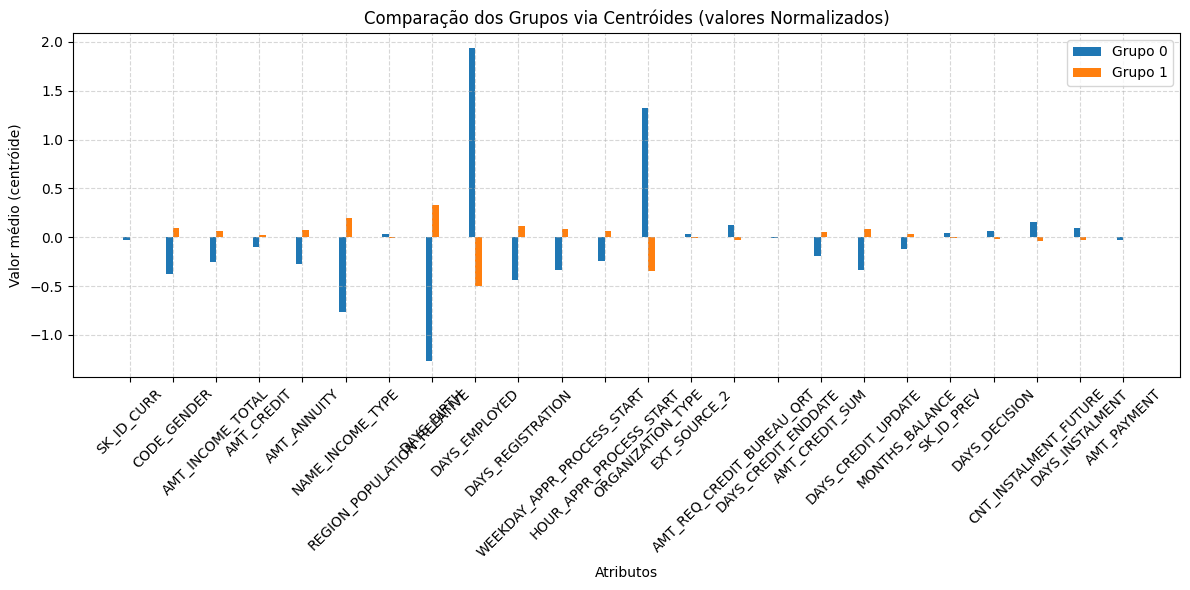

In [25]:
# Recriação dos centroides desnormalizados
centroides_normalizados = kmeans.cluster_centers_

#centroides = scaler.inverse_transform(centroides_normalizados)

colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Gerar gráfico de barras agrupadas
import matplotlib.pyplot as plt
import numpy as np

df_centroides_plot = df_centroides.drop('grupo', axis=1)
atributos = df_centroides_plot.columns
num_grupos = df_centroides.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
largura_barra = 0.15
indices = np.arange(len(atributos))

for i in range(num_grupos):
    valores = df_centroides_plot.iloc[i].values
    ax.bar(indices + i * largura_barra, valores, largura_barra, label=f'Grupo {i}')

ax.set_xlabel('Atributos')
ax.set_ylabel('Valor médio (centróide)')
ax.set_title('Comparação dos Grupos via Centróides (valores Normalizados)')
ax.set_xticks(indices + largura_barra * (num_grupos - 1) / 2)
ax.set_xticklabels(atributos, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Aplicação do K-Means (k =4)

## Executamos o K-Means com `k=4` para descobrir 3 grupos nos dados.

In [26]:
# impotando a biblioteca
from sklearn.cluster import KMeans

#Copia do DataFrame
dados = X_train_normalizado_colunasSelecionadas.copy()

#Instanciando o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

#Predição dos grupos
dados['grupo'] = kmeans.fit_predict(X_train_normalizado_colunasSelecionadas)
dados

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,1.091813,1.341641,0.276835,-0.295210,2.037863,-1.546720,-0.828173,0.628193,-0.485764,1.157712,...,-0.102473,0.099456,-0.088475,-0.028006,0.034514,0.715238,-0.603598,0.788847,0.005362,0
1,-0.569843,-0.745356,0.578679,1.794981,1.754623,-1.546720,-1.032836,0.295414,-0.488350,0.885275,...,-0.206904,-0.410991,0.028259,0.877718,-0.060754,1.063805,-0.685931,-0.338002,-0.028707,0
2,-1.269109,-0.745356,0.243297,-0.219560,1.000464,0.867417,1.099257,-0.407669,-0.484924,0.634118,...,-0.250369,-0.317236,0.825164,0.834588,0.191781,-2.491058,-0.850597,-0.326398,-0.004470,0
3,1.136587,-0.745356,0.578679,-0.834898,-0.085925,-0.339651,1.867518,-0.793926,-0.528212,-1.790653,...,0.777404,1.825749,0.171453,0.963977,-0.014863,-2.132047,-0.521265,-1.226331,0.123407,1
4,0.108273,1.341641,-0.427467,-0.698072,-0.781780,0.867417,-0.148909,-0.951440,-0.488105,-0.707626,...,-0.079010,-0.421891,0.832946,-2.658918,0.817251,-2.180351,0.302066,-0.706742,-0.183218,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1.576276,-0.745356,-0.645466,-0.899428,-0.185284,-0.742008,0.574043,-1.583967,2.012039,0.091484,...,-0.308451,0.004212,-0.908728,-0.329914,0.382287,-0.256051,0.960731,0.481994,0.017669,2
304,1.774595,-0.745356,-0.259776,-0.323268,-0.707951,0.867417,0.574043,-0.534399,-0.489742,-1.054822,...,-0.263832,-0.257708,-0.578759,1.265885,0.999536,-0.408794,-0.438931,1.267178,-0.299920,1
305,-1.189146,-0.745356,0.746370,1.825171,0.738958,-0.742008,-0.790084,-0.967618,2.012039,-1.100741,...,-0.324029,-0.399389,-1.117293,0.920847,1.714981,0.610798,-0.027266,0.873941,-0.204742,2
306,-0.771280,1.341641,1.081753,1.365108,2.372163,-0.339651,0.142099,-0.172634,-0.536756,1.163872,...,-0.133822,-0.329343,0.815825,-0.718082,1.538965,-0.299132,-0.685931,-0.029859,0.302718,0


##  Visualização dos Grupos
Visualizamos os personagens usando os atributos `AMT_INCOME_TOTAL` e `AMT_CREDIT`.

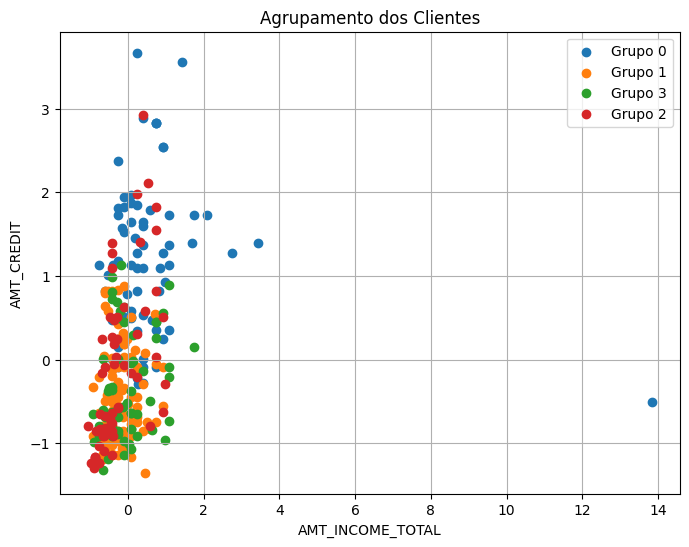

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')
    #for i, row in grupo.iterrows():
    #    plt.text(row['AMT_INCOME_TOTAL'], row['AMT_CREDIT'], row['SK_ID_CURR'], fontsize=8)

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Agrupamento dos Clientes')
plt.grid(True)
plt.show()

In [28]:
kmeans.cluster_centers_

array([[ 0.14664656,  0.31326556,  0.63409036,  1.18380946,  1.27148477,
        -0.1530514 ,  0.28507857,  0.13791973, -0.46070272,  0.27720735,
        -0.15986453,  0.31946165, -0.51930238,  0.54104799, -0.19725328,
        -0.009174  , -0.17695792,  0.03401089,  0.03512559,  0.15990556,
        -0.52212586, -0.33750666, -0.11908244, -0.07703431],
       [-0.18879939, -0.58343383, -0.21886533, -0.45803757, -0.44414863,
         0.20144843,  0.00973078,  0.37936435, -0.49809167,  0.07076219,
         0.10294972,  0.24487186, -0.17039871, -0.06277694,  0.05160953,
         0.0628992 ,  0.14922664,  0.03770485,  0.13001202, -0.13933382,
         0.1651289 , -0.15076573,  0.12331218,  0.13225119],
       [-0.04213658, -0.40322537, -0.26378977, -0.13425294, -0.30826005,
        -0.75519973,  0.01747561, -1.27532696,  1.97102802, -0.46002642,
        -0.31163462, -0.24325564,  1.33759034,  0.00771886,  0.14044982,
        -0.1051087 , -0.18505826, -0.30280706, -0.13406296,  0.0604292 ,
  

In [29]:
# Obter os centróides no espaço normalizado
centroides_normalizados = kmeans.cluster_centers_

# Desnormalizar os centróides para os valores reais
#centroides = scaler.inverse_transform(centroides_normalizados)

# Criar um DataFrame com os centroides
colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Exibir os centroides desnormalizados
df_centroides

,SK_ID_CURR,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,SK_ID_PREV,DAYS_DECISION,CNT_INSTALMENT_FUTURE,DAYS_INSTALMENT,AMT_PAYMENT,grupo
0,0.146647,0.313266,0.634090,1.183809,1.271485,-0.153051,0.285079,0.137920,-0.460703,0.277207,...,-0.009174,-0.176958,0.034011,0.035126,0.159906,-0.522126,-0.337507,-0.119082,-0.077034,0
1,-0.188799,-0.583434,-0.218865,-0.458038,-0.444149,0.201448,0.009731,0.379364,-0.498092,0.070762,...,0.062899,0.149227,0.037705,0.130012,-0.139334,0.165129,-0.150766,0.123312,0.132251,1
2,-0.042137,-0.403225,-0.263790,-0.134253,-0.308260,-0.755200,0.017476,-1.275327,1.971028,-0.460026,...,-0.105109,-0.185058,-0.302807,-0.134063,0.060429,0.081730,0.148198,0.078485,-0.029972,2
3,0.231491,1.139673,-0.036656,-0.328404,-0.280764,0.536447,-0.352665,0.391487,-0.494606,0.011708,...,-0.004059,0.099812,0.189528,-0.150439,0.023275,0.191713,0.511883,-0.175405,-0.132217,3


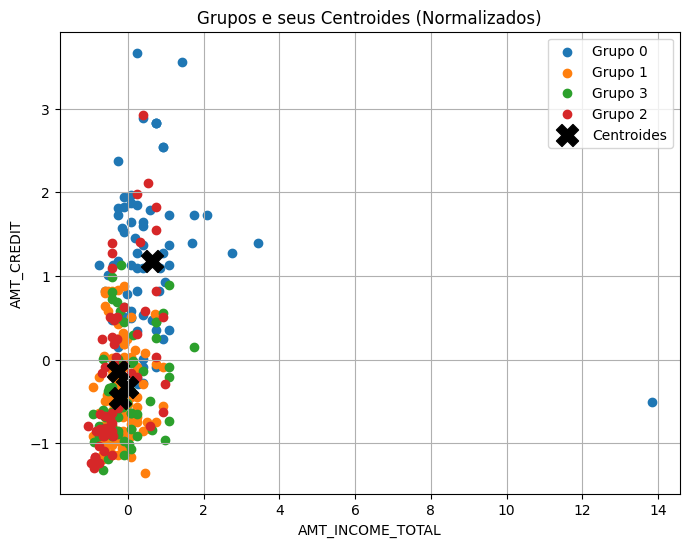

In [30]:
# Visualizar os centroides junto com os dados (ex: AMT_INCOME_TOTAL vs AMT_CRAMT_CREDITEDIT_SUM)
plt.figure(figsize=(8,6))

# Grupos
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['AMT_INCOME_TOTAL'], grupo['AMT_CREDIT'], label=f'Grupo {g}')

# Centroides
plt.scatter(df_centroides['AMT_INCOME_TOTAL'], df_centroides['AMT_CREDIT'],
            s=250, c='black', marker='X', label='Centroides')

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend()
plt.title('Grupos e seus Centroides (Normalizados)')
plt.grid(True)
plt.show()

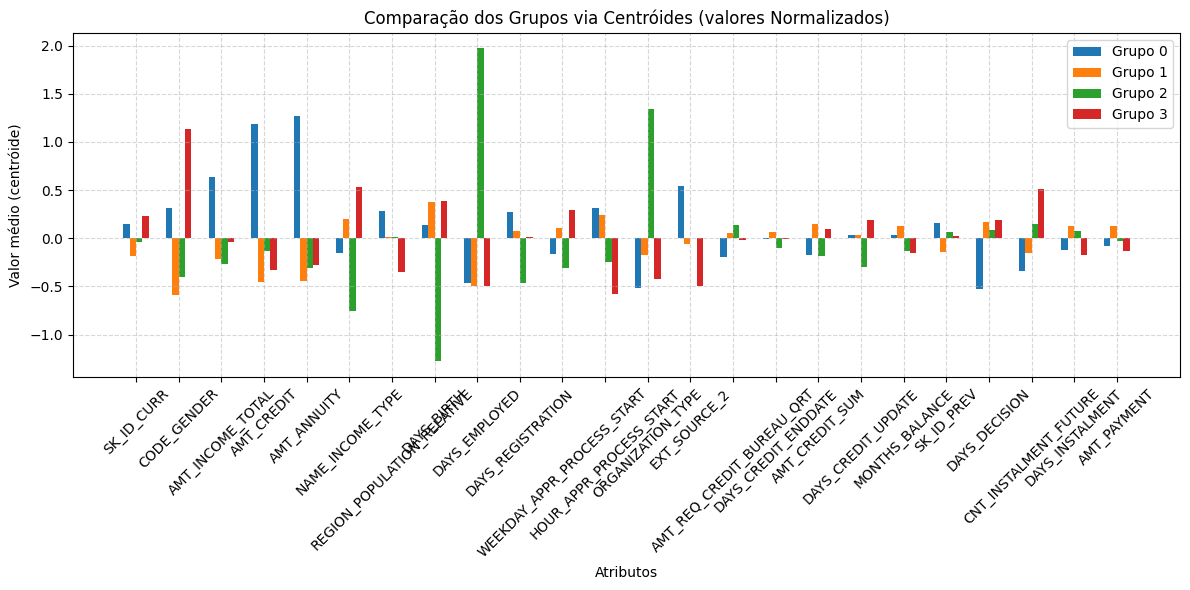

In [31]:
# Recriação dos centroides desnormalizados
centroides_normalizados = kmeans.cluster_centers_

#centroides = scaler.inverse_transform(centroides_normalizados)

colunas = X_train_normalizado_colunasSelecionadas.columns
df_centroides = pd.DataFrame(centroides_normalizados, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Gerar gráfico de barras agrupadas
import matplotlib.pyplot as plt
import numpy as np

df_centroides_plot = df_centroides.drop('grupo', axis=1)
atributos = df_centroides_plot.columns
num_grupos = df_centroides.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
largura_barra = 0.15
indices = np.arange(len(atributos))

for i in range(num_grupos):
    valores = df_centroides_plot.iloc[i].values
    ax.bar(indices + i * largura_barra, valores, largura_barra, label=f'Grupo {i}')

ax.set_xlabel('Atributos')
ax.set_ylabel('Valor médio (centróide)')
ax.set_title('Comparação dos Grupos via Centróides (valores Normalizados)')
ax.set_xticks(indices + largura_barra * (num_grupos - 1) / 2)
ax.set_xticklabels(atributos, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Resultados

> Como a escolha do valor de k afetou os resultados?<br>
Resp.: Observa-se que para k menores não consegue-se uma boa separabilidade. Para K = 2, tem-se os centróides bem próximos fazendo com que os clusters se misturem. Já para K = 3, tem-se 2 centróides próximos e 1 mais separado, mostrando uma melhor separabilidad. Finalmente, para K = 4 tem-se 3 centroídes próximos e 1 mais afastado, mostrando separabilidade, mas bem semelhante a K =3. <br><br> 

> Os agrupamentos fazem sentido em termos práticos ou de negócio?<br>
Resp.:Sim, pois os agrupamentos capturam perfis de clientes que fazem sentido para metas de negócio, e se tornam uma ferramenta poderosa para segmentação, personalização de ofertas e gestão de risco.<br><br>

> Como o K-Means lidou com os dados do seu trabalho prático?
Resp.: K‑Means “se encaixou” bem no seu caso prático, produzindo clusters interpretáveis e acionáveis. A análise dos centróides é possível fazer análise e delinear perfis.<br><br>

> Os agrupamentos poderiam ser utilizados para melhorar de alguma forma o resultado da classificação?
Resp.: Sim. Poderia-se usar o rótulo de cluster como nova feature, e depois de ajustar o K‑Means, você pode adicionar a coluna cluster ao seu conjunto de treino, e depois treinar o modelo como classificador.